# To steal or not to steal

Run the code blocks below by placing your cursor inside each block and pressing `Ctrl+enter` or `Cmd+Return`. \
Alternatively, click the `Cell` button on top of this notebook and choose `Run All`.

### Note: Please make sure that you scroll to the bottom and read the game instructions before playing.
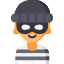

In [1]:
# needs to be run only once
!pip install pygame
!pip install numpy

In [2]:
import pygame
import numpy as np
from pygame import draw
from pygame import font

pygame 2.0.1 (SDL 2.0.14, Python 3.7.4)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
class Player(pygame.sprite.Sprite):
    def __init__(self, X, Y, scale = None, speed = 10):
        pygame.sprite.Sprite.__init__(self)
        self.X = X
        self.Y = Y
        self.speed = speed
        self.flip = False
        self.playerIcon = pygame.image.load('./images/player.png')
        self.rect = self.playerIcon.get_rect()
        self.rect.center = (playerX+32, playerY+32)
        self.steal = 0
        self.rand = np.random.random()
        self.rand2 = np.random.random()
        self.prob_risk_avoidance = np.random.random()
        self.prob_profit_seeking = np.random.random()
        self.learning_rate = np.random.random()

    def move(self, left, right, up, down):
        dx = 0
        dy = 0
        if left:
            dx = -self.speed
            self.flip = True
        if right:
            dx = self.speed
            self.flip = False
        if up:
            dy = -self.speed
            self.flip = False
        if down:
            dy = self.speed
            self.flip = False

        # update rectangle position
        self.rect.x += dx
        self.rect.y += dy
        
        # define x-axis boundaries
        self.rect.x = 0 if self.rect.x <0 else self.rect.x
        self.rect.x = 635 if self.rect.x >635 else self.rect.x

        
        # define y-axis boundaries
        self.rect.y = 0 if self.rect.y <0 else self.rect.y
        self.rect.y = 435 if self.rect.y >435 else self.rect.y
        
    def collide(self, item):
        collision_tolerance = 10
        if abs(self.rect.bottom - item.rect.top) <= collision_tolerance: # top collision
            self.rect.y -= self.speed
        if abs(self.rect.top - item.rect.bottom) <= collision_tolerance: # bottom collision
            self.rect.y += self.speed
        if abs(self.rect.left - item.rect.right) <= collision_tolerance: # right collision
            self.rect.x += self.speed
        if abs(self.rect.right - item.rect.left) <= collision_tolerance: # left collision
            self.rect.x -= self.speed

    def gotCaught(self, risk):        
        if self.rand2 < risk:
            return True
        return False

    def draw(self):
        screen.blit(pygame.transform.flip(self.playerIcon, self.flip, False), self.rect)
    
    def reset(self, item):
        collision_tolerance = 10
        if abs(self.rect.bottom - item.rect.top) <= collision_tolerance: # top collision
            self.rect.y = item.rect.top - 70
        if abs(self.rect.top - item.rect.bottom) <= collision_tolerance: # bottom collision
            self.rect.y = item.rect.bottom + 70
        if abs(self.rect.left - item.rect.right) <= collision_tolerance: # right collision
            self.rect.x = item.rect.right + 70
        if abs(self.rect.right - item.rect.left) <= collision_tolerance: # left collision
            self.rect.x = item.rect.left - 70

        self.rand = np.random.random()
        self.rand2 = np.random.random()

In [4]:
# ELEMENTS
class Element:
    def __init__(self, icon_path):
        self.icon = pygame.image.load(icon_path)
        self.rect = self.icon.get_rect()
        # self.risk= np.random.random()
        self.cost = np.random.random()
        self.reward = np.random.random()
        self.collided = False
        self.decision_info = []

    def decide(self, risk_avoidance, profit_seeking, rand):
        R = risk_avoidance * self.risk
        P = profit_seeking * (self.reward- self.cost)
        net = P-R
        self.decision_info = [Text('R = Risk Avoidance X Risk =  %.2f' % (risk_avoidance * self.risk)),
        Text('P = Profit Seeking X (Reward-Cost) = %.2f' % (profit_seeking * (self.reward-self.cost))),
        Text('Random Number= %.2f' % rand),
        Text('P - R = %.2f' % net)]
        if rand < net:
            return 1
        
        return 0
    
    def draw(self, x, y, scale = 0):
        if scale != 0:
            self.icon = pygame.transform.scale(self.icon, scale)
        self.rect.center = (x+32, y+32)
        screen.blit(self.icon, (x, y))

    def display_decision(self):
        for d in range(len(self.decision_info)):
            value = self.decision_info[d]
            value.write(loc = (20, 510+d*25), color = (4, 92, 90), font_size=20)

In [5]:
# GRAPHICS TO DISPLAY IN GAME WINDOW
class Graphics:
    def __init__(self, icon_path):
        self.icon = pygame.image.load(icon_path)
        self.rect = self.icon.get_rect()

    def draw(self, x, y, scale = 0):
        if scale != 0:
            self.icon = pygame.transform.scale(self.icon, scale)
        self.rect.center = (x+32, y+32)
        screen.blit(self.icon, (x, y))       

In [6]:
# TEXT
class Text:
    """Text to be displayed in game window"""
    def __init__(self, text):
        self.text = text
        
    def write(self, loc, color = (0, 0, 255), font_size = 16):
        font = pygame.font.Font('./font/arial.ttf', font_size)
        screen.blit(font.render(self.text, True, color), loc)  

In [7]:
class Button():
    def __init__(self,x, y, image, scale):
        width = image.get_width()
        height = image.get_height()
        self.image = pygame.transform.scale(image, (int(width * scale), int(height * scale)))
        self.rect = self.image.get_rect()
        self.rect.topleft = (x, y)
        self.clicked = False

    def draw(self, surface):
        action = False
        #get mouse position
        pos = pygame.mouse.get_pos()

        #check mouseover and clicked conditions
        if self.rect.collidepoint(pos):
            if pygame.mouse.get_pressed()[0] == 1 and self.clicked == False:
                action = True
                self.clicked = True

        if pygame.mouse.get_pressed()[0] == 0:
            self.clicked = False

        #draw button
        surface.blit(self.image, (self.rect.x, self.rect.y))

        return action

In [8]:
def isCollide(item1, item2):
    r1 = item1.rect
    r2 = item2.rect
    return r1.colliderect(r2)

def computeRisk(itemX, itemY):
    risk = np.hypot(400-itemX, 400-itemY) # police coordinates: (400, 400)
    return 100/risk

In [9]:
# PLAYER
playerX = 0
playerY = 0
player = Player(playerX, playerY)
move_left = False
move_right = False
move_up = False
move_down = False

In [10]:
# ELEMENTS
police = Element('./images/police.png')
policeX = 400
policeY = 400

car = Element('./images/car.png')
carX = 300
carY = 100
car.risk = computeRisk(carX, carY)

bank = Element('./images/bank.png')
bankX = 560
bankY = 280
bank.risk = computeRisk(bankX, bankY)

ring = Element('./images/store.png')
ringX = 10
ringY = 400
ring.risk = computeRisk(ringX, ringY)

In [11]:
rrc_car = [Text('Risk: %.2f' % car.risk), Text('Cost: %.2f' % car.cost), Text('Reward: %.2f' % car.reward)]
rrc_ring = [Text('Risk: %.2f' % ring.risk), Text('Cost: %.2f' % ring.cost), Text('Reward: %.2f' % ring.reward)]
rrc_bank = [Text('Risk: %.2f' % bank.risk), Text('Cost: %.2f' % bank.cost), Text('Reward: %.2f' % bank.reward)]

In [12]:
# WINDOW
size = width, height = 1100, 750 # window size
bg = pygame.image.load("./images/bg.jpg")
bg2 = pygame.image.load("./images/bg-2.jpg")
clock = pygame.time.Clock()
FPS = 50

# Time to play!
You're a thief in a new neighbourhood. You don't know much about the place except that there are 3 targets nearby - **a jewelry store, a car dealership and a bank**. But there's also **a police station**, so you must stay careful.

## Instructions
- Use the arrow keys to navigate in the game. At any time, press `Esc` to quit.
- Each target has a *risk*, *cost* and *reward* associated with it. **You can see these values on the right side of the screen at any time.**
- When you reach a target, a random number is picked to decide whether or not you will steal.
- If you steal, a random number is picked again, which determines if you get caught.
- **If you get caught, pay attention to how your `Risk avoidance` behaviour changes (on the panel to the right side).**

### Do not forget to press the `Proceed` button before moving away from a target!

In [13]:
# initialize game
pygame.init()
# Game loop
running = True
display_decision = False

while running:
    screen = pygame.display.set_mode(size)
    pygame.display.set_caption('To steal or not to steal')
    screen.fill((255, 255, 255))
    screen.blit(bg, (0, 0))
    screen.blit(bg2, (700, 0))
    player.draw()

    car.draw(carX, carY)
    bank.draw(bankX, bankY)
    ring.draw(ringX, ringY)
    police.draw(policeX, policeY)  
    
    # DISPLAY OUTSIDE GAME WINDOW
    Text('YOU').write((730, 30), color = (255, 255, 255), font_size=24)
    Graphics('./images/player.png').draw(720, 60)
    player_vals = [Text('Risk avoidance: %.2f' % player.prob_risk_avoidance), Text('Profit-seeking: %.2f' % player.prob_profit_seeking), Text('Learning Rate: %.2f' % player.learning_rate)]
    for i in range(len(player_vals)):
        prob = player_vals[i]
        prob.write(loc = (800, 70+i*20), color = (255, 255, 255))

    Text('JEWELRY STORE').write((730, 150), color = (255, 255, 51), font_size=24)
    Graphics('./images/store.png').draw(720, 180) 
    for j in range(len(rrc_ring)):
        value = rrc_ring[j]
        value.write(loc = (800, 180+j*20), color = (255, 255, 51))

    Text('BANK').write((730, 270), color = (255, 255, 194), font_size=24)
    Graphics('./images/bank.png').draw(730, 300) 
    for k in range(len(rrc_bank)):
        value = rrc_bank[k]
        value.write(loc = (800, 300+k*20), color = (255, 255, 194))    

    Text('CAR DEALERSHIP').write((730, 390), color = (241,12,69), font_size=24)
    Graphics('./images/car.png').draw(730, 420) 
    for l in range(len(rrc_car)):
        value = rrc_car[l]
        value.write(loc = (800, 420+l*20), color = (241,12,69))              

    # DECISION DISPLAY
    if display_decision:
        foo.write((20, 620), color=(110, 110, 110), font_size=24)
        if car.collided:
            car.display_decision()
            if steal:
                Text('Random Number 2: %.2f' % player.rand2).write((550, 550), color = (190, 0, 0), font_size = 24)
                foo2.write((550, 620), color = (190, 0, 0), font_size=24)

        elif bank.collided:
            bank.display_decision()
            if steal:
                Text('Random Number 2: %.2f' % player.rand2).write((550, 550), color = (190, 0, 0), font_size = 24)
                foo2.write((550, 620), color = (190, 0, 0), font_size=24)


        elif ring.collided:
            ring.display_decision()
            if steal:
                Text('Random Number 2: %.2f' % player.rand2).write((550, 550), color = (190, 0, 0), font_size = 24)
                foo2.write((550, 620), color = (190, 0, 0), font_size=24)

        proceed = Button(15, 660, pygame.image.load('./images/proceed_btn.png'), 0.7)
        
        if proceed.draw(screen):
            if steal and caught:
                player.prob_risk_avoidance -= player.learning_rate

            steal = 0
            caught = 0
            display_decision = False

            if car.collided:
                player.reset(car)
                car.collided = False
                car.decision_info.clear()

            elif bank.collided:
                player.reset(bank)
                bank.collided = False
                bank.decision_info.clear()
            
            elif ring.collided:
                player.reset(ring)
                ring.collided = False
                ring.decision_info.clear()


    # MOVE PLAYER
    player.move(move_left, move_right, move_up, move_down)

    for event in pygame.event.get():
        if event.type == pygame.QUIT: # quit button pressed
            running = False

        # MOVEMENT
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_LEFT:
                move_left = True
            if event.key == pygame.K_RIGHT:
                move_right = True
            if event.key == pygame.K_UP:
                move_up = True
            if event.key == pygame.K_DOWN:
                move_down = True
            if event.key == pygame.K_ESCAPE: # quit game
                running = False

        if event.type == pygame.KEYUP:
            if event.key == pygame.K_LEFT:
                move_left = False
            if event.key == pygame.K_RIGHT:
                move_right = False
            if event.key == pygame.K_UP:
                move_up = False
            if event.key == pygame.K_DOWN:
                move_down = False                

    # CHECK FOR COLLISIONS

    if isCollide(player, police):
        player.collide(police)

    if isCollide(player, bank):
        player.collide(bank)
        display_decision = True
        bank.collided = True
        steal = bank.decide(player.prob_risk_avoidance, player.prob_profit_seeking, player.rand)
        if steal:
            caught = player.gotCaught(bank.risk)
            foo2 = Text('Random Number 2 < Risk. You got caught.') if caught else Text('Random Number 2 > Risk. You did not get caught.')
            
        foo = Text('Random Number < (P-R). You steal.') if steal else Text('Random Number > (P-R). You don\'t steal.')

    if isCollide(player, car):
        player.collide(car)
        display_decision = True
        car.collided = True
        steal = car.decide(player.prob_risk_avoidance, player.prob_profit_seeking, player.rand)
        if steal:
            caught = player.gotCaught(car.risk)
            foo2 = Text('Random Number 2 < Risk. You got caught.') if caught else Text('Random Number 2 > Risk. You did not get caught.')
        foo = Text('Random Number < (P-R). You steal.') if steal else Text('Random Number > (P-R). You don\'t steal.')
        
    if isCollide(player, ring):
        player.collide(ring)
        display_decision = True
        ring.collided = True
        steal = ring.decide(player.prob_risk_avoidance, player.prob_profit_seeking, player.rand)
        if steal:
            caught = player.gotCaught(ring.risk)
            foo2 = Text('Random Number 2 < Risk. You got caught.') if caught else Text('Random Number 2 > Risk. You did not get caught.')

        foo = Text('Random Number < (P-R). You steal.') if steal else Text('Random Number > (P-R). You don\'t steal.')

       
    clock.tick(FPS)
    pygame.display.update()
